In [1]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from IPython.display import Audio # We only need the Audio 'Class' from this package

# Class 10 - DST Lab Spring 2024
## New York University

## Fast Convolution

convolving in time domain = multiplying in frequency domain

In [2]:
x = np.array([1,1,4,2])
h = np.array([1,0,2,0,3])
u = np.convolve(x,h)
print('Convolution result:',u)

Convolution result: [ 1  1  6  4 11  7 12  6]


## FFT based convolution

result will be of length len(x) + len(h) - 1

suppose we have two signals in time domain

to convolve them...

take fft of each signal

multiply these ffts together

take inverse fft of result

In [6]:
x = np.array([1,1,4,2, 0, 0, 0, 0])
h = np.array([1,0,2,0,3, 0, 0, 0])

X = np.fft.rfft(x)
H = np.fft.rfft(h)

Y = X * H

y = np.fft.irfft(Y)

print(y)

[ 1.  1.  6.  4. 11.  7. 12.  6.]


In [ ]:
help(np.pad)

In [11]:
def fast_conv(x, h):
    x_p = np.pad(x, [0, len(h)-1])
    # print(x_p)
    
    h_p = np.pad(h, [0, len(x)-1])
    # print(h_p)
    
    X = np.fft.rfft(x_p)
    H = np.fft.rfft(h_p)
    
    Y = X * H
    
    y = np.fft.irfft(Y)
    
    return y

In [12]:
x = np.array([1,1,4,2])
h = np.array([1,0,2,0,3])
print(fast_conv(x, h))

[1 1 4 2 0 0 0 0]
[1 0 2 0 3 0 0 0]
[ 1.  1.  6.  4. 11.  7. 12.  6.]


# Convolution Interpretation

Impulse response created scaled and shifted copies of input signal


## Basic Delay

In [16]:
x, sr = sf.read("Snare.wav")
# print(x)
# print(x[:, 0])
x = x[:, 0]

h = np.zeros(sr*2)

h[0] = 1
h[sr] = 1

y = fast_conv(x, h)

Audio(y, rate = sr)

[-0.00686646 -0.01577759 -0.04364014 ...  0.          0.
  0.        ]
[1. 0. 0. ... 0. 0. 0.]


## Towards a very naive reverb
#### NOTE: THIS APPROACH WILL NOT MAKE A GOOD SOUNDING REVERB THIS IS JUST FOR DEMONSTRATION PURPOSES

Reverb is made up of many reflections of an input signal.

There are many reflections very close together in time so we perceive them as blended together

#### np.random.normal()
Generates numbers in a normal distribution



[36800.00742627  3694.57105976 22975.05852817 ... 15428.54623918
 12740.12290613 13843.37907976]


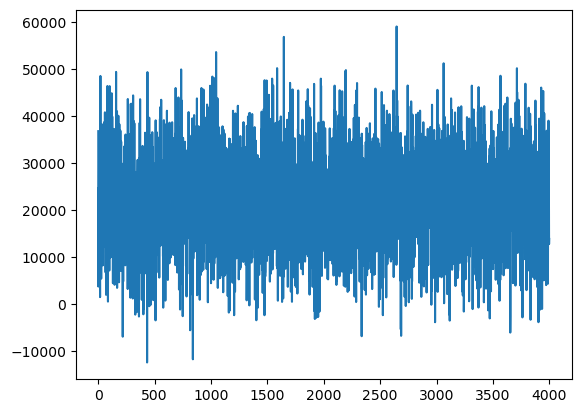

In [32]:
# help(np.random.normal)

h = np.zeros(sr * 2)

my_delays = np.random.normal(sr/2, 10000, 4000)
print(my_delays)
plt.plot(my_delays)

for i in range(len(my_delays)):
    if (my_delays[i] > 0 and my_delays[i] < (sr*2)):
        amp = 0.07 * (1-my_delays[i]/(sr*2))
        h[int(my_delays[i])] = amp
        
h[0] = 1

In [33]:
y = fast_conv(x, h)
Audio(y, rate = sr)

[-0.00686646 -0.01577759 -0.04364014 ...  0.          0.
  0.        ]
[1. 0. 0. ... 0. 0. 0.]


## Convolution with real impulse responses

In [34]:
x_s, sr = sf.read('Snare.wav')

x = x_s[:,0]

h, sr = sf.read('ir.wav')
    
y = fast_conv(x, h)

Audio(y, rate = sr)

[-0.00686646 -0.01577759 -0.04364014 ...  0.          0.
  0.        ]
[0.00054932 0.00045776 0.00094604 ... 0.         0.         0.        ]


# Delays as phase cancellation filters

## Task: design a filter that uses phase cancellation to bandpass out a 200Hz sine wave

## Question: will this filter remove any other frequencies?

In [38]:
def sine_gen(amplitude, frequency, phase, duration, sample_rate):
    t_v = np.arange(0, duration, 1/sample_rate) 
    output = amplitude * np.sin(2 * np.pi * frequency * t_v + phase)
    return output

120
[0.         0.13052619 0.25881905 ... 0.         0.         0.        ]
[1. 0. 0. ... 0. 0. 0.]


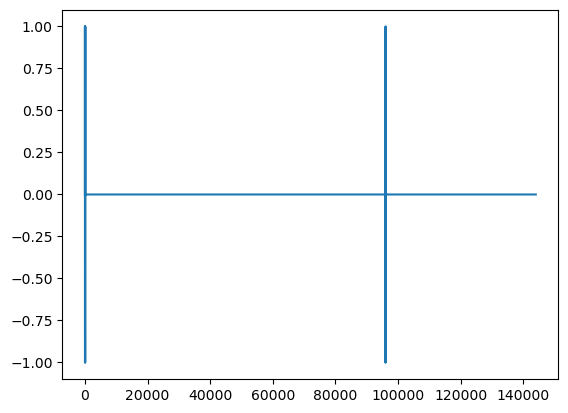

In [50]:
sr = 48000

my_freq = 200

my_sine = sine_gen(1, 200*5, 0, 2, sr)

# we need to use an impulse resonse to create a copy of our input signal that has been
# delayed 180 degrees (half of one period)

my_period = 1/my_freq

my_delay_seconds = my_period/2

phase_delay = int(my_delay_seconds * sr)
print(phase_delay)

h = np.zeros(sr)
h[0] = 1
h[phase_delay] = 1

y = fast_conv(my_sine, h)

plt.plot(y)
# plt.xlim(0, phase_delay*2)
Audio(y, rate = sr)

# Filters and Convolution

### IIR (Infinite Impulse Response) Filters
    - Impulse response CANNOT be represented by a finite sequence of numbers
    - Contain some sort of feedback term
    - Are not implemented through convolution
    
### FIR (Finite Impulse Response) Filters
    -Impulse response CAN be represented by a finite sequence of numbers
    - No feedback term
    - Can be implemented through convolution
    - Complex FIR filters require a convolution of long arrays and can be computationally intensive

### Moving Average Filter - a basic FIR lowpass filter

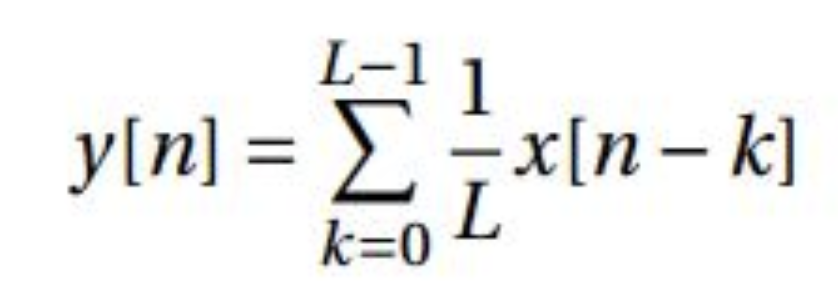

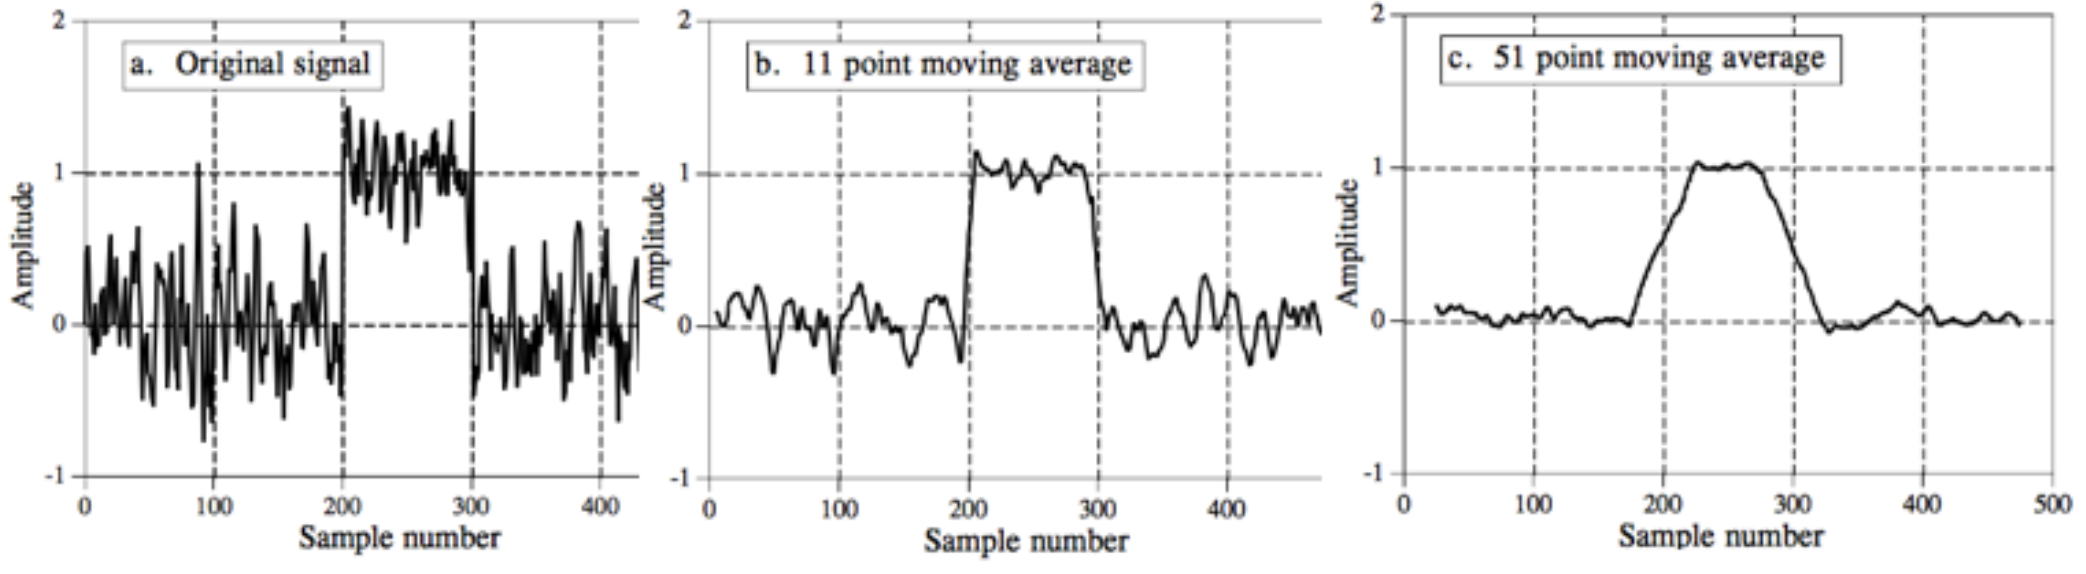